Python Workshop: Review of basic syntax and exercises
------------------------------------------------

Σκοπός αυτού του μαθήματος είναι να δούμε πάλι βασικά στοιχεία του συντακτικού της γλώσσας Python και ορισμένες πολύ χρήσιμες βιβλιοθήκες.

Συγκεκριμένα το μάθημα περιλαμβάνει: 

    (α) Βασικές αλγοριθμικές δομές: Ακολουθία, Επιλογή, Επανάληψη
    
    (β) Χρήση της matplotlib για σχεδιασμό γραφικών παραστάσεων
    
    (γ) Χρήση της numpy για διευκόλυνση και επιτάχυνση υπολογισμών
    
    (δ) Ασκήσεις 


Fibonacci numbers
-----------------------

Ακολουθία Fibonacci είναι μια ακολουθία $a_{n}$ με την ιδιότητα $a_n = a_{n-2} + a_{n-1}$. Με $a_0 = 0$ και $a_1 = 1$.
θέλουμε να βρούμε τον αριθμό Fibonacci για δοσμένο n. Θα θέλαμε επίσης να κρατάμε τις τιμές μέχρι και n.

In [5]:
for i in range(1,10,2):
    print(i)

1
3
5
7
9


In [9]:
n=0
N=4
while n<N:
    print(n)
    n=n+1

0
1
2
3


In [12]:
a=[1,2,3]

In [13]:
a.append(5)

In [11]:
n = 9
a_0 = 0
a_1 = 1
i = 2
while (i <= n):
    res = a_0 + a_1
    a_0 = a_1
    a_1 = res
    i = i + 1
print('the ',n+1,'th Fibonacci number is : ',res)
print('The {}th Fibonacci number is {}'.format(n+1,res))

the  10 th Fibonacci number is :  34
The 10th Fibonacci number is 34


Πως θα τροποποιηθούν οι παραπάνω γραμμές κώδικα για να κρατάμε ΟΛΟΥΣ τους αριθμούς μέχρι ν;


In [10]:
n = 9
a_0 = 0
a_1 = 1
i = 2
nums = [a_0,a_1]
while (i <= n):
    res = a_0 + a_1
    a_0 = a_1
    a_1 = res
    i = i + 1
    nums.append(res)
print('The first ',n,' Fib. nums')
print(nums)

The first  9  Fib. nums
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


Πως αλλιως μπορεί να υπολογιστεί;

In [31]:
import numpy as np

In [34]:
a=[1,2]

In [37]:
a=np.array(a)

In [42]:
a=np.append(a,3)
a

array([1, 2, 3])

In [11]:
import numpy as np

In [45]:
n = 9
a_0 = 0
a_1 = 1
i = 2
nums = np.array([a_0,a_1])
while (i <= n):
    res = a_0 + a_1
    a_0 = a_1
    a_1 = res
    i = i + 1
    nums=np.append(nums,res)
print('The first ',n,' Fib. nums')
print(nums)

The first  9  Fib. nums
[ 0  1  1  2  3  5  8 13 21 34]


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

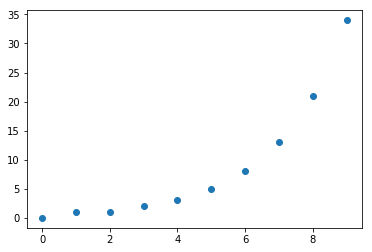

In [48]:
plt.plot(nums,'o')

In [68]:
def fib(n,a_0=1,a_1=2):        
    if n==0:
        result = a_0
    elif n==1:
        result = a_1
    else:        
        nums = np.array([a_0,a_1])
        i=nums.shape[0]
        while (i <= n):
            res = a_0 + a_1
            a_0 = a_1
            a_1 = res
            i = i + 1
            nums=np.append(nums,res)
        result = nums
    return result

In [97]:
fib(10)[-1]/fib(9)[-1]

1.6179775280898876

In [112]:
np.array([i**2 for i in range(10)])

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [117]:
def PHI(N):
    return np.array([fib(i)[-1]/fib(i-1)[-1] for i in range(3,N)])

In [119]:
phi_real=(1+np.sqrt(5))/2
phi_real

1.618033988749895

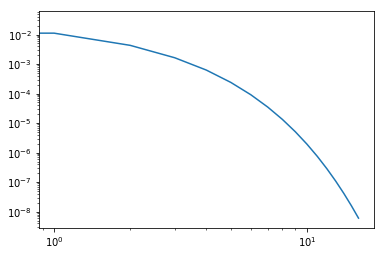

In [124]:
plt.plot(np.abs(PHI(20)-phi_real)/phi_real)
plt.xscale('log')
plt.yscale('log')

In [125]:
def fib2(n,a):
    s=a.shape[0]
    i=0
    nums = a.copy()
    while (i <= n):
        res = nums[-s:].sum()
        i = i + 1
        nums=np.append(nums,res)
    return nums
fib2(8,np.array([1,2,3]))

array([  1,   2,   3,   6,  11,  20,  37,  68, 125, 230, 423, 778])

In [127]:
fib2(0,a=np.array([0,1]))

array([0, 1, 1])

In [128]:
FF2=fib2(10,np.array([1,1]))
FF3=fib2(10,np.array([1,1,2]))
FF4=fib2(10,np.array([1,2]))

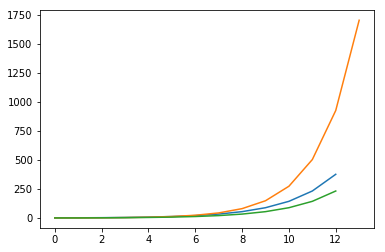

In [129]:
plt.plot(FF4)
plt.plot(FF3)
plt.plot(FF2)

In [131]:
F3=[FF3[i]/FF3[i-1] for i in range(1,FF3.shape[0])]
F2=[FF2[i]/FF2[i-1] for i in range(1,FF2.shape[0])]

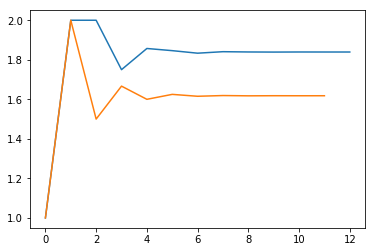

In [132]:
plt.plot(F3)
plt.plot(F2)

In [155]:
F=np.zeros((30,30))
for i in range(1,F.shape[0]):
    for j in range(1,F.shape[1]):
        seq=fib2(5,np.array([i,j]))
        #print(seq)
        F[i,j]=seq[-1]/seq[-2]
        #F[i,j]=[seq[k]/seq[k-1] for k in range(1,seq.shape[0])][-1]

In [156]:
true_phi=(1.+5**0.5)/2.

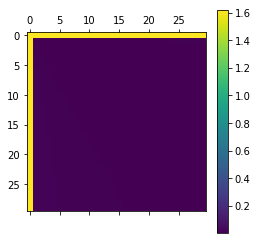

In [157]:
plt.matshow(np.abs(F-true_phi))
plt.colorbar()

In [131]:
N=np.arange(1,10)
F=np.zeros(N.shape)
for i in N:
    seq=fib2(20,N[:i])
    F[i-1]=[seq[k]/seq[k-1] for k in range(1,seq.shape[0])][-1]

In [133]:
F

array([1.        , 1.61803399, 1.83928676, 1.92756198, 1.96594825,
       1.9835828 , 1.99196429, 1.99603112, 1.99802937])

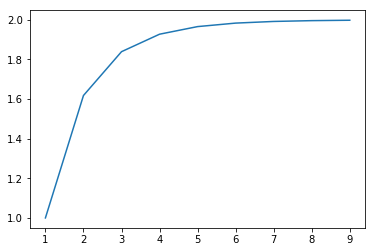

In [132]:
plt.plot(N,F)

In [80]:
n = 20
a_0 = 0
a_1 = 1
i = 2
all_ph = []
while (i <= n):
    temp = a_0 + a_1
    res = float(temp)/a_1
    a_0 = a_1
    a_1 = temp
    i = i + 1
    all_ph.append(res)
print('the ',n+3,'th approx. to the golden ratio is : ',res)

the  23 th approx. to the golden ratio is :  1.6180339631667064


Πως θα δούμε την ταχύτητα σύγκλισης στην πραγματική τιμή του φ;

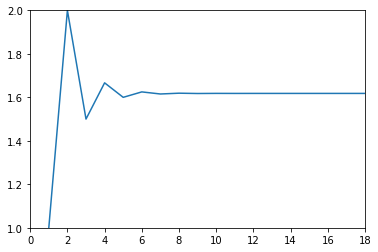

In [87]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.arange(1,len(all_ph)+1,1)
plt.plot(xx,all_ph)
plt.axis([0,18, 1., 2.])
plt.show()

Τι γίνεται με το σφάλμα;

In [88]:
err = abs(np.array(all_ph) - (1.+5**0.5)/2.) 

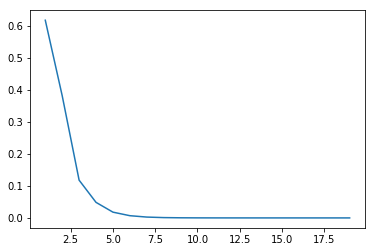

In [91]:
xx = np.arange(1,len(all_ph)+1,1)
plt.plot(xx,err)
plt.show()

%%html
<style>
div.input {
    display:none;
}
</style>